# Importing Required Libraries

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

Load the Datasets

In [2]:
data1 = pd.read_csv('bitstampUSD_1-min_data_2012-01-01_to_2019-08-12.csv')
data2 = pd.read_csv('coinbaseUSD_1-min_data_2014-12-01_to_2019-01-09.csv')

In [3]:
print("Sample of the Dataset 1")
data1.head(10)

Sample of the Dataset 1


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1325318220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1325318280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1325318340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1325318400,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1325318460,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data1.tail(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
3997687,1565567460,11545.51,11551.97,11540.09,11551.97,0.060427,697.565087,11543.884627
3997688,1565567520,11547.31,11558.24,11547.31,11558.24,2.092439,24184.122669,11557.863307
3997689,1565567580,11549.34,11549.74,11540.02,11549.74,0.103055,1189.775668,11545.106772
3997690,1565567640,11556.97,11556.97,11535.42,11536.12,5.936226,68594.445972,11555.228825
3997691,1565567700,11537.63,11551.63,11537.63,11551.63,0.074052,855.347940,11550.565971
3997692,1565567760,11555.57,11555.57,11540.37,11540.58,0.036868,425.909106,11552.336234
3997693,1565567820,11553.49,11556.22,11553.49,11556.22,0.623462,7204.428272,11555.520505
3997694,1565567880,11559.73,11561.22,11546.77,11561.22,0.159070,1838.731403,11559.252199
3997695,1565567940,11559.73,11589.73,11528.73,11528.73,16.198210,187504.635170,11575.638889
3997696,1565568000,11527.44,11551.57,11520.00,11520.00,23.805939,274731.256920,11540.450291


In [5]:
print("Sample of the Dataset 2")
data2.head(10)

Sample of the Dataset 2


,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1417411980,300.0,300.0,300.0,300.0,0.01,3.0,300.0
1,1417412040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1417412100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1417412160,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1417412220,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1417412280,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1417412340,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1417412400,300.0,300.0,300.0,300.0,0.01,3.0,300.0
8,1417412460,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,1417412520,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
print(data1.info(null_counts=True))
print(data2.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3997697 entries, 0 to 3997696
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Timestamp          3997697 non-null  int64  
 1   Open               2765819 non-null  float64
 2   High               2765819 non-null  float64
 3   Low                2765819 non-null  float64
 4   Close              2765819 non-null  float64
 5   Volume_(BTC)       2765819 non-null  float64
 6   Volume_(Currency)  2765819 non-null  float64
 7   Weighted_Price     2765819 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 244.0 MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2099760 entries, 0 to 2099759
Data columns (total 8 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Timestamp          2099760 non-null  int64  
 1   Open               1990691 non-null  float64
 2   High          

In [7]:
print("datatypes of columns of data1")
print("\n")
print(data1.dtypes)
print("\n")
print("datatypes of columns of data2")
print("\n")
print(data2.dtypes)

datatypes of columns of data1


Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object


datatypes of columns of data2


Timestamp              int64
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume_(BTC)         float64
Volume_(Currency)    float64
Weighted_Price       float64
dtype: object


In [8]:
data1.apply(lambda x: sum(x.isnull()))

Timestamp                  0
Open                 1231878
High                 1231878
Low                  1231878
Close                1231878
Volume_(BTC)         1231878
Volume_(Currency)    1231878
Weighted_Price       1231878
dtype: int64

In [9]:
data2.apply(lambda x: sum(x.isnull()))

Timestamp                 0
Open                 109069
High                 109069
Low                  109069
Close                109069
Volume_(BTC)         109069
Volume_(Currency)    109069
Weighted_Price       109069
dtype: int64

In [10]:
data1['Timestamp']=pd.to_datetime(data1['Timestamp'],unit='s')
data2['Timestamp']=pd.to_datetime(data2['Timestamp'],unit='s')

In [11]:
data1.head(10)

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2011-12-31 07:57:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2011-12-31 07:58:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2011-12-31 07:59:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2011-12-31 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2011-12-31 08:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data1['Open'].fillna(value=np.mean(data1['Open']),inplace=True)
data1['High'].fillna(value=np.mean(data1['High']),inplace=True)
data1['Low'].fillna(value=np.mean(data1['Low']),inplace=True)
data1['Close'].fillna(value=np.mean(data1['Close']),inplace=True)
data1['Volume_(BTC)'].fillna(value=np.mean(data1['Volume_(BTC)']),inplace=True)
data1['Volume_(Currency)'].fillna(value=np.mean(data1['Volume_(Currency)']),inplace=True)
data1['Weighted_Price'].fillna(value=np.mean(data1['Weighted_Price']),inplace=True)

data2['Open'].fillna(value=np.mean(data2['Open']),inplace=True)
data2['High'].fillna(value=np.mean(data2['High']),inplace=True)
data2['Low'].fillna(value=np.mean(data2['Low']),inplace=True)
data2['Close'].fillna(value=np.mean(data2['Close']),inplace=True)
data2['Volume_(BTC)'].fillna(value=np.mean(data2['Volume_(BTC)']),inplace=True)
data2['Volume_(Currency)'].fillna(value=np.mean(data2['Volume_(Currency)']),inplace=True)
data2['Weighted_Price'].fillna(value=np.mean(data2['Weighted_Price']),inplace=True)

In [13]:
df1 = data1
df2 = data2
df1.index = data1.Timestamp
df2.index = data2.Timestamp
df1 = df1.resample('M').mean()
df2 = df2.resample('M').mean()

In [14]:
df1

,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
Timestamp,,,,,,,
2011-12-31,3047.034727,3049.392910,3044.408085,3047.013352,10.477726,26757.534105,3046.875207
2012-01-31,3025.391793,3027.733153,3022.783806,3025.370506,10.350603,26566.858391,3025.233387
2012-02-29,3017.456296,3019.791494,3014.855154,3017.435034,10.393194,26497.465486,3017.298276
2012-03-31,3019.081055,3021.417511,3016.478512,3019.059783,10.485762,26512.218919,3018.922959
2012-04-30,3005.920033,3008.246293,3003.328868,3005.898874,10.620445,26397.343962,3005.762640
...,...,...,...,...,...,...,...
2019-04-30,5085.270218,5087.332631,5083.167540,5085.328863,7.097525,35521.860525,5085.244395
2019-05-31,7215.276681,7220.649213,7209.646713,7215.009636,8.341133,61076.689392,7215.246809
2019-06-30,9343.045519,9350.541762,9335.165268,9342.593570,7.805517,77935.376602,9342.968139


# EDA - Exploratory Data Analysis

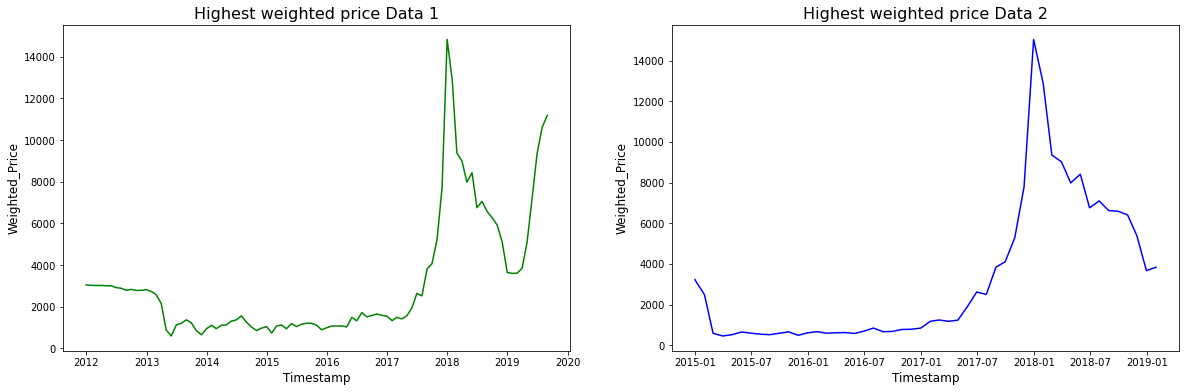

[]

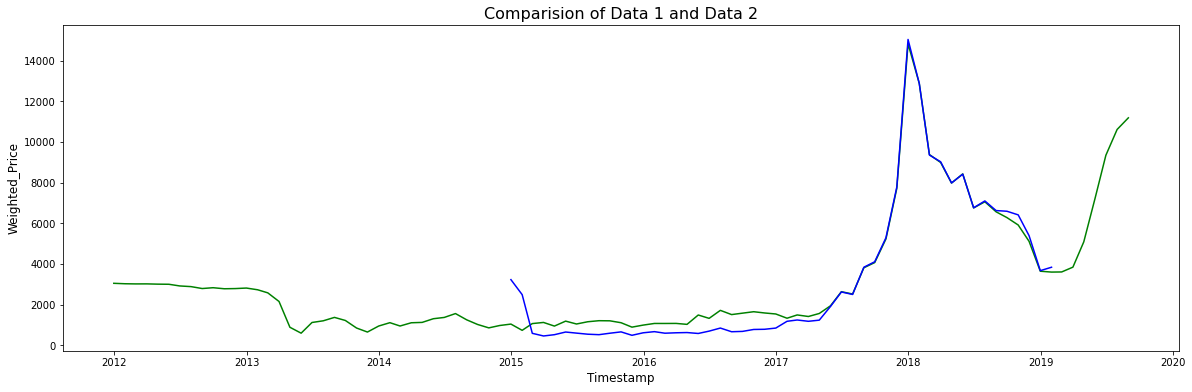

In [15]:
plt.figure(figsize=(20,6))
plt.subplots_adjust(hspace=.1)
plt.subplot(1,2,1)
plt.title("Highest weighted price Data 1",fontsize = 16)
plt.xlabel("Timestamp",fontsize=12)
plt.ylabel("Weighted Price",fontsize=12)
data=sns.lineplot(x = df1.index, y=df1.Weighted_Price, color = 'Green')
plt.subplot(1,2,2)
plt.title("Highest weighted price Data 2",fontsize = 16)
plt.xlabel("Timestamp",fontsize=12)
plt.ylabel("Weighted Price",fontsize=12)
data=sns.lineplot(x = df2.index, y=df2.Weighted_Price, color = 'Blue')
plt.show()

plt.figure(figsize=(20,6))
#plt.subplots_adjust(hspace=.1)
plt.title("Comparision of Data 1 and Data 2",fontsize = 16)
plt.xlabel("Timestamp",fontsize=12)
plt.ylabel("Weighted Price",fontsize=12)
sns.lineplot(x = df1.index, y=df1.Weighted_Price, color = 'Green')
sns.lineplot(x = df2.index, y=df2.Weighted_Price, color = 'Blue')
plt.plot()

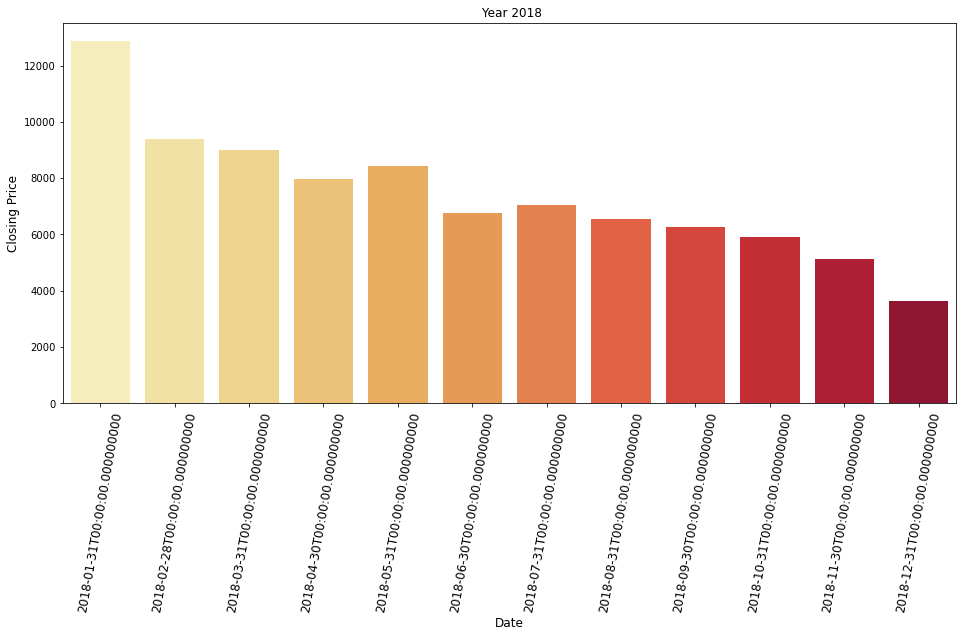

In [16]:
plt.figure(figsize = (16,7))
df_2018 = df1['2018']
bar = sns.barplot(x = df_2018.index, y = df_2018.Close, palette = 'YlOrRd')
bar.set_xticklabels(bar.get_xticklabels(),rotation = 80,fontsize=12)
bar.set_title(" Year 2018")
bar.set_xlabel("Date",fontsize = 12)
bar.set_ylabel("Closing Price", fontsize = 12)
plt.show()

[Text(0, 0, '2014-12-31T00:00:00.000000000'),
 Text(0, 0, '2017-06-30T00:00:00.000000000'),
 Text(0, 0, '2017-08-31T00:00:00.000000000'),
 Text(0, 0, '2017-09-30T00:00:00.000000000'),
 Text(0, 0, '2017-10-31T00:00:00.000000000'),
 Text(0, 0, '2017-11-30T00:00:00.000000000'),
 Text(0, 0, '2017-12-31T00:00:00.000000000'),
 Text(0, 0, '2018-01-31T00:00:00.000000000'),
 Text(0, 0, '2018-02-28T00:00:00.000000000'),
 Text(0, 0, '2018-03-31T00:00:00.000000000'),
 Text(0, 0, '2018-04-30T00:00:00.000000000'),
 Text(0, 0, '2018-05-31T00:00:00.000000000'),
 Text(0, 0, '2018-06-30T00:00:00.000000000'),
 Text(0, 0, '2018-07-31T00:00:00.000000000'),
 Text(0, 0, '2018-08-31T00:00:00.000000000'),
 Text(0, 0, '2018-09-30T00:00:00.000000000'),
 Text(0, 0, '2018-10-31T00:00:00.000000000'),
 Text(0, 0, '2018-11-30T00:00:00.000000000'),
 Text(0, 0, '2018-12-31T00:00:00.000000000'),
 Text(0, 0, '2019-01-31T00:00:00.000000000')]

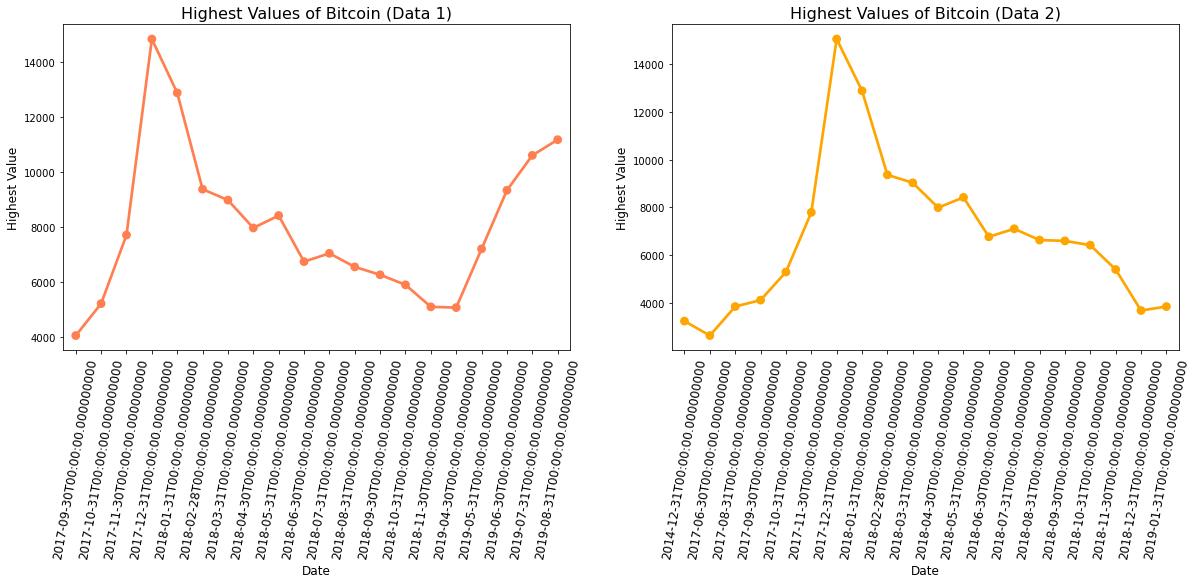

In [17]:
df1_high = df1.sort_values(by=['High'], ascending=False).head(20)
df2_high = df2.sort_values(by=['High'], ascending=False).head(20) 

plt.figure(figsize = (20,6))
plt.subplots_adjust(hspace =.2)
plt.subplot(1,2,1)
plt.title('Highest Values of Bitcoin (Data 1)',fontsize = 16)
point = sns.pointplot(x = df1_high.index, y=df1_high.High, color = 'Coral')
point.set_xlabel('Date',fontsize = 12)
point.set_ylabel('Highest Value',fontsize = 12)
point.set_xticklabels(point.get_xticklabels(),rotation = 80,fontsize=12)

plt.subplot(1,2,2)
plt.title('Highest Values of Bitcoin (Data 2)',fontsize = 16)
point = sns.pointplot(x = df2_high.index, y=df2_high.High, color = 'Orange')
point.set_xlabel('Date',fontsize = 12)
point.set_ylabel('Highest Value',fontsize = 12)
point.set_xticklabels(point.get_xticklabels(),rotation = 80,fontsize=12)

[Text(0, 0, '2015-02-28T00:00:00.000000000'),
 Text(0, 0, '2015-03-31T00:00:00.000000000'),
 Text(0, 0, '2015-04-30T00:00:00.000000000'),
 Text(0, 0, '2015-05-31T00:00:00.000000000'),
 Text(0, 0, '2015-06-30T00:00:00.000000000'),
 Text(0, 0, '2015-07-31T00:00:00.000000000'),
 Text(0, 0, '2015-08-31T00:00:00.000000000'),
 Text(0, 0, '2015-09-30T00:00:00.000000000'),
 Text(0, 0, '2015-10-31T00:00:00.000000000'),
 Text(0, 0, '2015-11-30T00:00:00.000000000'),
 Text(0, 0, '2015-12-31T00:00:00.000000000'),
 Text(0, 0, '2016-01-31T00:00:00.000000000'),
 Text(0, 0, '2016-02-29T00:00:00.000000000'),
 Text(0, 0, '2016-03-31T00:00:00.000000000'),
 Text(0, 0, '2016-04-30T00:00:00.000000000'),
 Text(0, 0, '2016-05-31T00:00:00.000000000'),
 Text(0, 0, '2016-06-30T00:00:00.000000000'),
 Text(0, 0, '2016-08-31T00:00:00.000000000'),
 Text(0, 0, '2016-09-30T00:00:00.000000000'),
 Text(0, 0, '2016-10-31T00:00:00.000000000')]

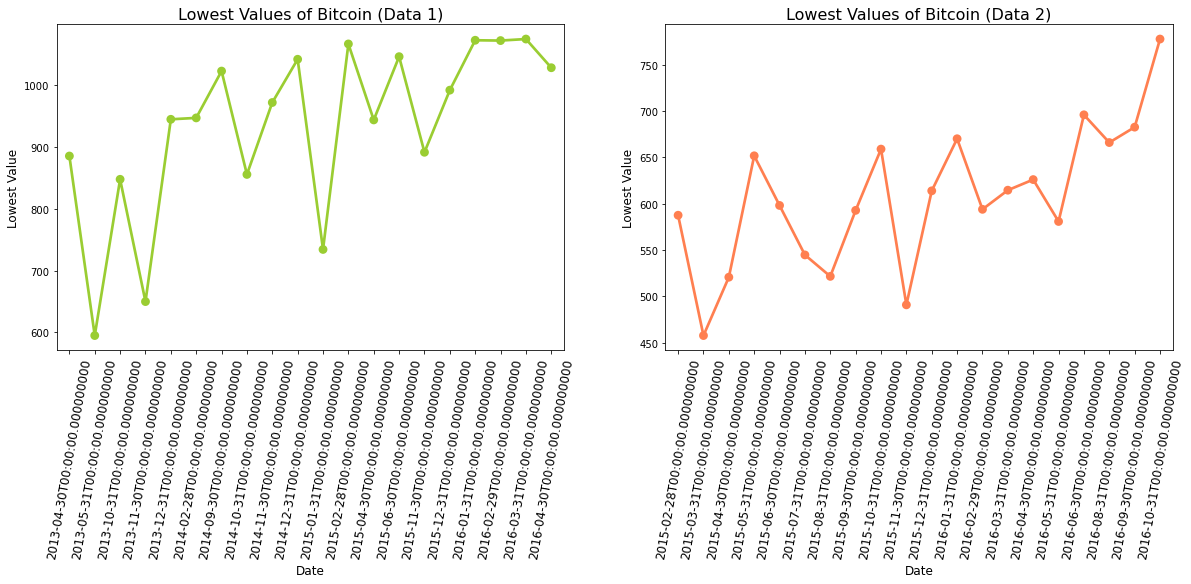

In [18]:
df1_low = df1.sort_values(by=['Low'], ascending=True).head(20)
df2_low = df2.sort_values(by=['Low'], ascending=True).head(20) 

plt.figure(figsize = (20,6))
plt.subplots_adjust(hspace =.2)
plt.subplot(1,2,1)
plt.title('Lowest Values of Bitcoin (Data 1)',fontsize = 16)
point = sns.pointplot(x = df1_low.index, y=df1_low.Low, color = 'YellowGreen')
point.set_xlabel('Date',fontsize = 12)
point.set_ylabel('Lowest Value',fontsize = 12)
point.set_xticklabels(point.get_xticklabels(),rotation = 80,fontsize=12)

plt.subplot(1,2,2)
plt.title('Lowest Values of Bitcoin (Data 2)',fontsize = 16)
point = sns.pointplot(x = df2_low.index, y=df2_low.Low, color = 'Coral')
point.set_xlabel('Date',fontsize = 12)
point.set_ylabel('Lowest Value',fontsize = 12)
point.set_xticklabels(point.get_xticklabels(),rotation = 80,fontsize=12)

# Modelling

In [22]:
x = df1[['High','Low','Open','Close']].values
y = df1['Weighted_Price'].values

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state=0)

In [24]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)
ypred=lm.predict(xtest)
score=lm.score(xtest,ytest)
print("Linear Regression Score:",score)

Linear Regression Score: 0.9999999993576824


In [25]:
result = pd.DataFrame({'pred':ypred, 'actual':ytest})
result['error'] = result.pred - result.actual

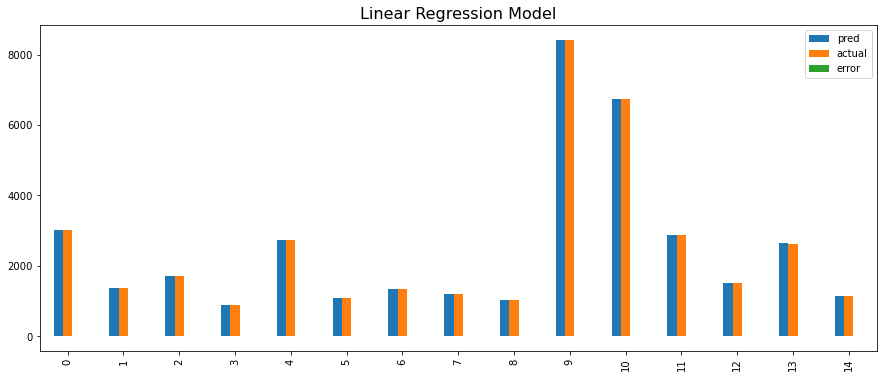

In [26]:
result_= result.head(15)
result_.plot(kind='bar',figsize=(15,6))
plt.title("Linear Regression Model",fontsize = 16)
plt.show()

In [27]:
poly = PolynomialFeatures(2)
xtrain = poly.fit_transform(xtrain)
xtest = poly.fit_transform(xtest)
#model = linear_model.LinearRegression()
lm.fit(xtrain,ytrain)
print(lm.score(xtrain, ytrain))

0.9999999999745597


In [28]:
x = df2[['High','Low','Open','Close']].values
y = df2['Weighted_Price'].values

In [29]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.3, random_state=0)

In [30]:
lm=LinearRegression()
lm.fit(xtrain,ytrain)
ypred=lm.predict(xtest)
score=lm.score(xtest,ytest)
print("Linear Regression Score:",score)

Linear Regression Score: 0.9999999999672973


In [31]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 100,random_state =0)
regressor.fit(xtrain,ytrain)
ypred = regressor.predict(xtest)
print("Score:",regressor.score(xtest,ytest))

Score: 0.9923942639963814


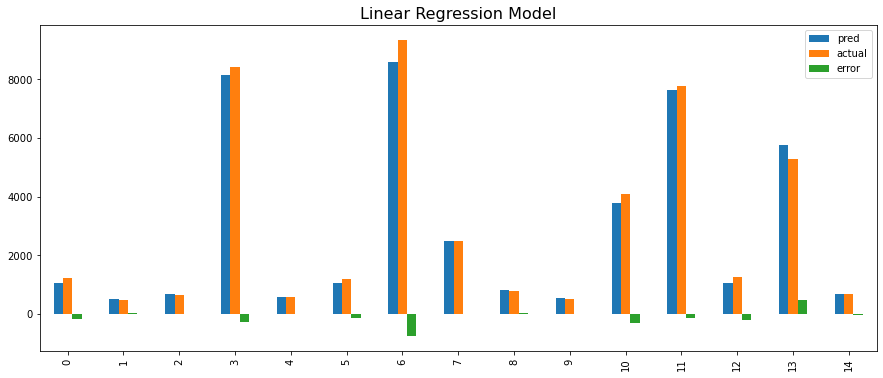

In [32]:
result = pd.DataFrame({'pred':ypred, 'actual':ytest})
result['error'] = result.pred - result.actual
result_= result.head(15)
result_.plot(kind='bar',figsize=(15,6))
plt.title("Linear Regression Model",fontsize = 16)
plt.show()

All three models i.e. Linear,Polynomial and Random Forest Regression give 99% of accuracy